In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import os
import nltk
nltk.download()   # Used to download stopwords 
from  nltk.corpus import stopwords
import re
import string

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [22]:
import sys  
!{sys.executable} -m pip install contractions
import contractions

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [5]:
conn = sqlite3.connect('tweet.db')  # Data will be store in tweet.db
cur = conn.cursor                   # Connect for execution
tweets = pd.read_csv('Tweets.csv')  # Read csv file using pandas
tweets.to_sql('tweets', conn, if_exists='replace', index=False)  #Transform csv to sql

In [6]:
query = "SELECT airline, airline_sentiment, text, negativereason, airline_sentiment AS sentiment FROM 'Tweets'"  # 
tweets_db = pd.read_sql_query(sql = query, con = conn)

Text(0.5, 0, '# of Tweets')

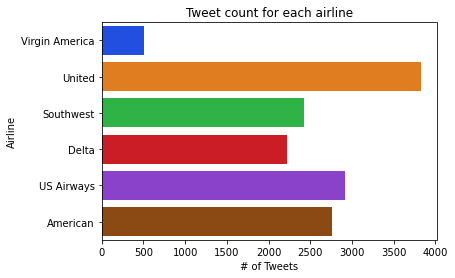

In [7]:
#Plotting A Counter Plot
count_plot = sns.countplot(y ="airline", data = tweets_db, palette="bright")
count_plot.set_title("Tweet count for each airline")
count_plot.set_ylabel("Airline")
count_plot.set_xlabel("# of Tweets")

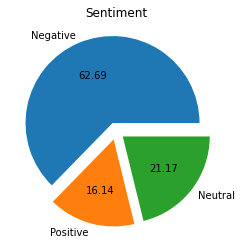

In [8]:
# Pie Graph for Sentiment
sentiment_count = tweets_db["airline_sentiment"].value_counts()
pie_data = [sentiment_count['negative'],sentiment_count['positive'], sentiment_count['neutral']]
pie_labels = ['Negative', 'Positive', 'Neutral']
explode = [0.1,0.1,0.1]
colors = sns.color_palette('tab10')
plt.pie(x = pie_data, labels = pie_labels, explode = explode, colors = colors,autopct='%.2f') 
plt.title("Sentiment")
#plt.legend
plt.show()



In [9]:
def sentiment_conversion(sentiment):
    if sentiment == "positive":
        return 1
    elif sentiment == "negative":
        return -1 
    elif sentiment == "neutral":
        return 0        


### Cleaning Data

- Stopwords
- Capital Letters


In [10]:
def testing(func):
    i_max = tweets_db['text'].str.len().max()  # Finds longest tweet
    print("Originial tweet: ")
    n_tweet = tweets_db['text'].loc[i_max]
    print(n_tweet)  # Prints longest tweet
    print("")
    print("After Clean: ")
    print(func(n_tweet))  # Prints tweet after it has been cleaned
    

In [11]:
def clean_stopword(text):
    words = text.split()
    n_text = [word for word in words if word not in (stopwords.words('english'))]
    n_text = " ".join(n_text)
    return n_text 
    
# Testing:    
testing(clean_stopword) 

Originial tweet: 
@VirginAmerica a lot of "apologies" being thrown out to customers from what I can see.Very sad. Thanks for nothing. Worst airline ever.

After Clean: 
@VirginAmerica lot "apologies" thrown customers I see.Very sad. Thanks nothing. Worst airline ever.


In [12]:
def clean_capital(text):
    n_text = text.lower()
    return n_text 

# Testing    
testing(clean_capital)  

Originial tweet: 
@VirginAmerica a lot of "apologies" being thrown out to customers from what I can see.Very sad. Thanks for nothing. Worst airline ever.

After Clean: 
@virginamerica a lot of "apologies" being thrown out to customers from what i can see.very sad. thanks for nothing. worst airline ever.


In [13]:
def clean_mentions(text):
    text = re.sub('@[\S]+','',text)
    return text 

# Testing
testing(clean_mentions)    

Originial tweet: 
@VirginAmerica a lot of "apologies" being thrown out to customers from what I can see.Very sad. Thanks for nothing. Worst airline ever.

After Clean: 
 a lot of "apologies" being thrown out to customers from what I can see.Very sad. Thanks for nothing. Worst airline ever.


In [14]:
def clean_punctuations(text):
    n_text = re.sub(r'[^\w\s]', ' ', text) #Leads to unecessary spaces but useful
    return n_text

# Testing
testing(clean_punctuations)


Originial tweet: 
@VirginAmerica a lot of "apologies" being thrown out to customers from what I can see.Very sad. Thanks for nothing. Worst airline ever.

After Clean: 
 VirginAmerica a lot of  apologies  being thrown out to customers from what I can see Very sad  Thanks for nothing  Worst airline ever 


In [15]:
#https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python
def remove_emojis(text):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', text)

# Testing
testing(remove_emojis)

Originial tweet: 
@VirginAmerica a lot of "apologies" being thrown out to customers from what I can see.Very sad. Thanks for nothing. Worst airline ever.

After Clean: 
@VirginAmerica a lot of "apologies" being thrown out to customers from what I can see.Very sad. Thanks for nothing. Worst airline ever.


In [25]:
def clean_contractions(text):
    contract = text.split()
    expand_word = []
    for word in contract:
        expand_word.append(contractions.fix(word))
    expand = ' '.join(expand_word)
    return expand    

I will be there within 5 min. Should not you be there too? I would love to see you there my dear. It is awesome to meet new friends. We have been waiting for this day for so long.


In [17]:
text01 = tweets_db['negativereason'] + ' ' + tweets_db['text'] 

In [27]:
airline_names = ['virgin','america','delta','united','southwest','american','airways']
def clean_airline(text):
    words = text.split()
    n_text = [word for word in words if word not in airline_names]
    n_text = " ".join(n_text)
    return n_text



'atlantic is a pain in the reall really, go'

In [28]:
tweets_db['processed_text'] = tweets_db['text'] # Make Copy
tweets_db['processed_text'] = tweets_db['processed_text'].apply(lambda x : remove_emojis(x))
tweets_db['processed_text'] = tweets_db['processed_text'].apply(lambda x : clean_contractions(x))
tweets_db['processed_text'] = tweets_db['processed_text'].apply(lambda x : clean_stopword(x))
tweets_db['processed_text'] = tweets_db['processed_text'].apply(lambda x : clean_mentions(x))
tweets_db['processed_text'] = tweets_db['processed_text'].apply(lambda x : clean_capital(x))
tweets_db['processed_text'] = tweets_db['processed_text'].apply(lambda x : clean_airline(x))
tweets_db['processed_text'] = tweets_db['processed_text'].apply(lambda x : clean_punctuations(x))

In [30]:
tweets_db['encoded_sentiment'] = tweets_db['airline_sentiment'] # Make Copy
tweets_db['encoded_sentiment'] = tweets_db['encoded_sentiment'].apply(lambda x : sentiment_conversion(x))

In [37]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(tweets_db['processed_text'])




In [39]:
x_train, x_test, y_train, y_test = train_test_split(X,tweets_db['encoded_sentiment'],test_size = 0.2)

In [41]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [43]:
from sklearn.metrics import accuracy_score
prediction = rf.predict(x_test)
acc_score = accuracy_score(prediction,y_test)
print(acc_score)

0.7619535519125683


In [19]:
# References:
# https://thehelloworldprogram.com/python/python-string-methods/#:~:text=Performing%20the%20.,of%20the%20characters%20to%20lowercase.